# Train test split


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

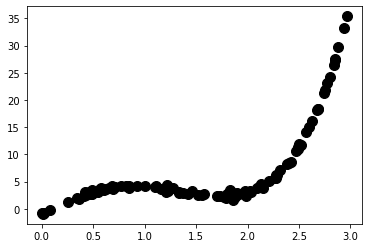

In [3]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [5]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [6]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([ 6.06530488, -0.32739924, 25.74588974, -0.47309117,  0.98696509,
        7.75470921, 20.89684773, 12.74240736, -0.53874126, 15.07119827,
        0.61543045, -0.37447057, -0.34807072,  3.72196285,  7.87411374,
       14.52518006, 10.11353393,  2.91059267, 14.49313168,  0.14039539,
        5.7262247 , -0.57090222,  5.80283757,  2.10107086, 18.58492387,
        5.92532166, 20.22991259, -0.49579756,  8.20171074, 18.73428409,
        0.24063351,  4.36550962,  4.89621012,  3.24064329, 16.02106206,
        4.70452092,  6.75426275,  0.03754571, -0.32226443, -0.35896824])

In [7]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.7393298004425557
Explained variance score: 0.7393298004425557
Median absolute error: 3.332300044076589
Mean squared error: 13.703753645161015
Mean absolute errors: 3.268389858662174


# Zadanie
Wylicz powyższe miary na zbiorze testowym dla wszystkich modeli nauczonych na trainie:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [9]:
for i in {1,2,3,4,5,25}:
    
    model = make_pipeline(PolynomialFeatures(i), linear_model.LinearRegression())
    model.fit(X_train, y_train)
    print("i: " + str(i))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    print("-----------")


i: 1
Explained variance score: 0.45859627489430554
Explained variance score: 0.45859627489430554
Median absolute error: 3.548959482408311
Mean squared error: 28.94344127060571
Mean absolute errors: 4.18658463034275
-----------
i: 2
Explained variance score: 0.7393298004425557
Explained variance score: 0.7393298004425557
Median absolute error: 3.332300044076589
Mean squared error: 13.703753645161015
Mean absolute errors: 3.268389858662174
-----------
i: 3
Explained variance score: 0.9864288506934132
Explained variance score: 0.9864288506934132
Median absolute error: 0.5202138004551491
Mean squared error: 0.7117533057126704
Mean absolute errors: 0.6579481770240653
-----------
i: 4
Explained variance score: 0.9982634485361909
Explained variance score: 0.9982634485361909
Median absolute error: 0.24453762232324383
Mean squared error: 0.09130464005433898
Mean absolute errors: 0.25240001746960583
-----------
i: 5
Explained variance score: 0.9982554401187386
Explained variance score: 0.9982554